In [80]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf
cf.go_offline()
import plotly.graph_objs as go


In [81]:
final = pd.read_csv("final_merged_table.csv")
final.head(10)

,Unnamed: 0,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,RATE_DOWN_PAYMENT_prev,DAYS_DECISION_prev,SELLERPLACE_AREA_prev,CNT_PAYMENT_prev,DAYS_FIRST_DRAWING_prev,DAYS_FIRST_DUE_prev,DAYS_LAST_DUE_1ST_VERSION_prev,DAYS_TERMINATION_prev,NFLAG_INSURED_ON_APPROVAL_prev,CNT_PREV
0,0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,...,0.000000,-606.000000,500.000000,24.000000,365243.0,-565.000000,125.000000,-17.000000,0.000000,1.0
1,1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,...,0.050030,-1305.000000,533.000000,10.000000,365243.0,-1274.333333,-1004.333333,-1047.333333,0.666667,3.0
2,2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,...,0.212008,-815.000000,30.000000,4.000000,365243.0,-784.000000,-694.000000,-714.000000,0.000000,1.0
3,3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,...,0.108994,-280.000000,3.428571,31.500000,365243.0,-348.000000,522.000000,-279.500000,0.000000,7.0
4,4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,...,0.159516,-1392.600000,491.200000,20.000000,365243.0,-1493.000000,-1133.000000,-1131.000000,0.500000,5.0
5,5,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,...,0.073051,-1192.000000,73.000000,14.000000,365243.0,-1434.500000,-1044.500000,-872.750000,0.250000,5.0
6,6,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,...,0.122368,-826.833333,148.333333,7.666667,365243.0,-795.833333,-595.833333,-588.833333,0.000000,6.0
7,7,Cash loans,M,Y,Y,Unaccompanied,State servant,Higher education,Married,House / apartment,...,0.000000,-1070.000000,8636.000000,10.000000,365243.0,-1039.000000,-769.000000,-762.000000,0.000000,1.0
8,8,Cash loans,F,N,Y,Children,Pensioner,Secondary / secondary special,Married,House / apartment,...,0.050005,-1619.666667,456.333333,21.000000,365243.0,-1818.000000,-1218.000000,-734.500000,1.000000,3.0
9,9,Revolving loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,...,0.000000,-779.750000,9.750000,18.000000,365243.0,-973.333333,-463.333333,-559.333333,0.666667,4.0


# Exploration in terms of loan is repayed or not: Thăm dò về khoản vay có được hoàn trả hay không

# TARGET

In [82]:
#Distribution of Taget: Data is balanced or imbalanced:1 client with payment difficulties: 
#he/she had late payment more than X days on a...
# 1 khách hàng gặp khó khăn trong thanh toán: họ đã chậm thanh toán hơn X ngày vào ngày ..
#1: Gap kho khan, 0: khong kho khan
# => deliquency : trả nợ muộn 

In [83]:
temp = final["TARGET"].value_counts()
temp

0.0    282686
1.0     24825
Name: TARGET, dtype: int64

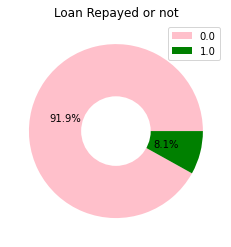

In [84]:
# Pie Chart
plt.pie(temp.values, autopct='%1.1f%%', colors=['pink', 'green'])
# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
# Adding Title of chart
plt.title('Loan Repayed or not')
# Add Legends
plt.legend(temp.index, loc="upper right")
# Displaying Chart
plt.show()

# 1. NAME_INCOME_TYPE: Income sources of Applicant's in terms of loan is repayed or not in %

In [85]:
# Clients income type (businessman, working, maternity leave,..)
temp = final["NAME_INCOME_TYPE"].value_counts()
temp

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

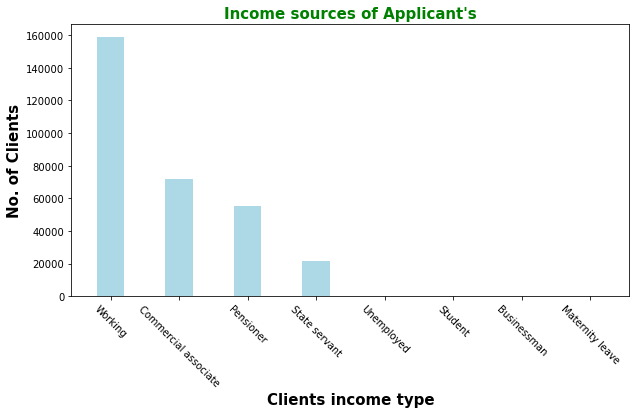

In [86]:
fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
plt.bar(temp.index, temp.values, color ='lightblue',width = 0.4)
 
plt.xticks(temp.index, rotation = -45)
plt.xlabel('Clients income type', fontweight ='bold', fontsize = 15)
plt.ylabel("No. of Clients", fontweight ='bold', fontsize = 15)
plt.title('Income sources of Applicant\'s', fontweight ='bold', fontsize = 15, color = 'green')
plt.show()

In [87]:
groupby_target = final.groupby('TARGET')['NAME_INCOME_TYPE'].value_counts(normalize = True)
groupby_target

TARGET  NAME_INCOME_TYPE    
0.0     Working                 0.507807
        Commercial associate    0.234384
        Pensioner               0.185294
        State servant           0.072356
        Student                 0.000064
        Unemployed              0.000050
        Businessman             0.000035
        Maternity leave         0.000011
1.0     Working                 0.613253
        Commercial associate    0.215911
        Pensioner               0.120121
        State servant           0.050312
        Unemployed              0.000322
        Maternity leave         0.000081
Name: NAME_INCOME_TYPE, dtype: float64

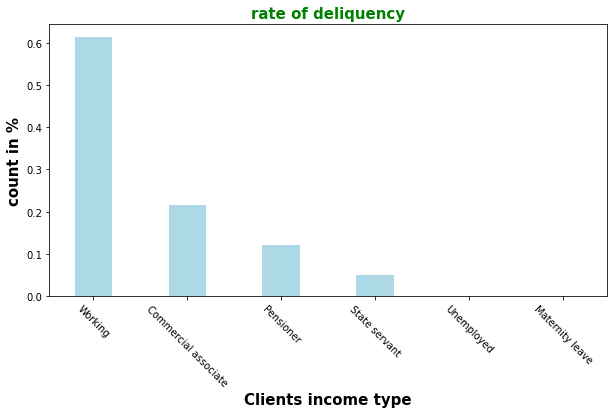

In [99]:
temp = groupby_target[1]
fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
plt.bar(temp.index, temp.values, color ='lightblue',width = 0.4)
 
plt.xticks(temp.index, rotation = -45)
plt.xlabel('Clients income type', fontweight ='bold', fontsize = 15)
plt.ylabel('count in %', fontweight ='bold', fontsize = 15)
plt.title('rate of deliquency', fontweight ='bold', fontsize = 15, color = 'green')
plt.show()

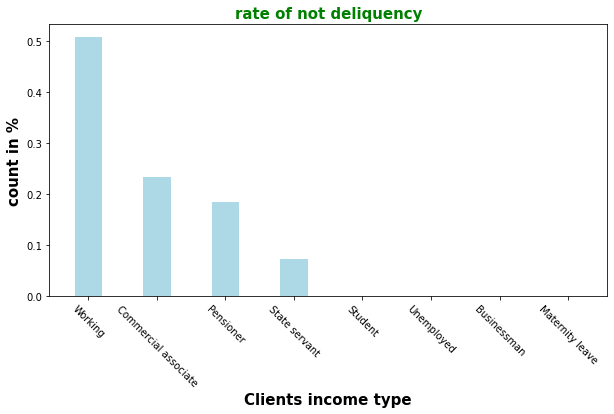

In [98]:
groupby_target = final.groupby('TARGET')['NAME_INCOME_TYPE'].value_counts(normalize = True)
temp = groupby_target[0]
fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
plt.bar(temp.index, temp.values, color ='lightblue',width = 0.4)
 
plt.xticks(temp.index, rotation = -45)
plt.xlabel('Clients income type', fontweight ='bold', fontsize = 15)
plt.ylabel('count in %', fontweight ='bold', fontsize = 15)
plt.title('rate of not deliquency', fontweight ='bold', fontsize = 15, color = 'green')
plt.show()

# 2: OCCUPATION_TYPE: Occupation of Applicant's in terms of loan is repayed or not in %

In [100]:
# Distribution of OCCUPATION_TYPE: Occupation of Applicant's who applied for loan

In [101]:
temp = final["OCCUPATION_TYPE"].value_counts().sort_values(ascending = False)

Text(10000, 20, "Occupation of Applicant's who applied for loan")

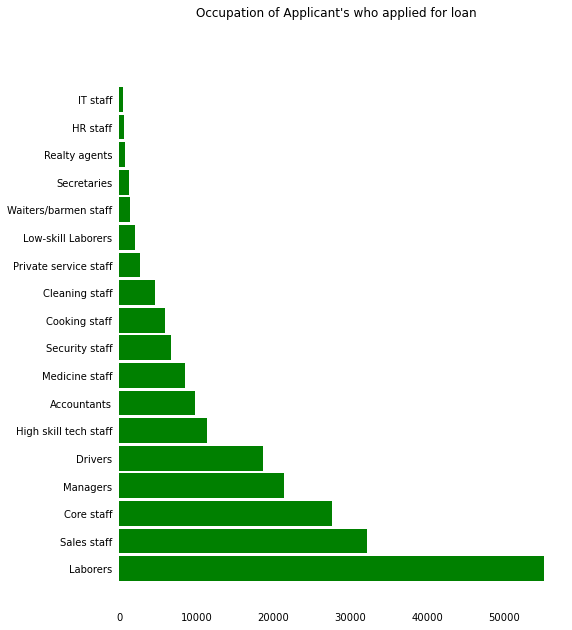

In [102]:
fig, ax = plt.subplots(figsize = (8, 10))          
ax.barh(temp.index, temp.values, height = 0.9, color = 'green')
l = ['left', 'right', 'top', 'bottom']
for i in l:
    ax.spines[i].set_visible(False)
#ax.xaxis.tick_top()
#xoa vach diem chia
ax.tick_params(left = False, bottom = False)
ax.text(x= 10000, y = 20, s = 'Occupation of Applicant\'s who applied for loan', size = 12)

In [ ]:
# Loại nghề nghiệp có tác động đến deliquency nếu có thì loại nào có khả năng deliquency cao nhất

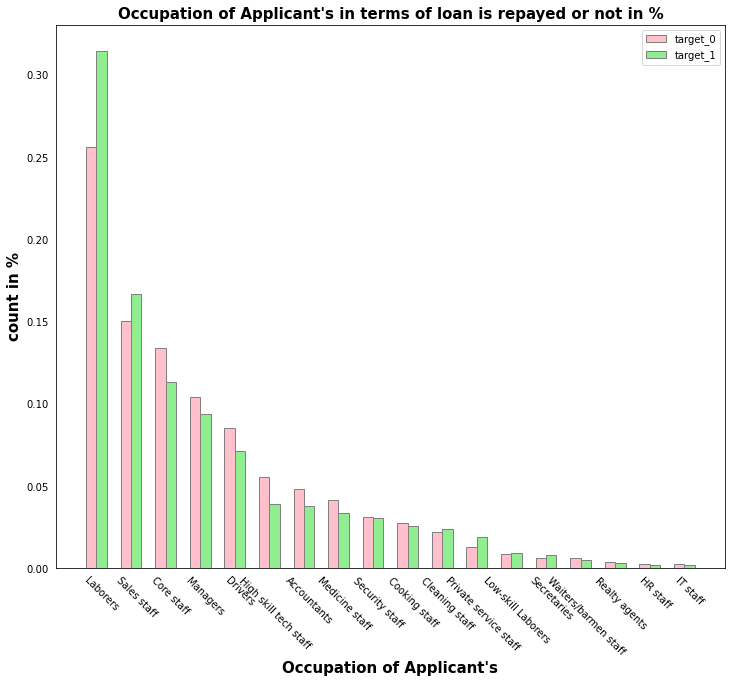

In [106]:
groupby_target = final.groupby('TARGET')['OCCUPATION_TYPE'].value_counts(normalize = True)
fig = plt.subplots(figsize =(12, 10))
index = groupby_target[0].index
barWidth = 0.3
value_0 = groupby_target[0].values  # cac gtri y
value_1 = groupby_target[1].values
# Set position of bar on X axis
br1 = np.arange(len(value_0))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, value_0, color ='pink', width = barWidth, edgecolor ='grey', label ='target_0')
plt.bar(br2, value_1, color ='lightgreen', width = barWidth, edgecolor ='grey', label ='target_1')
# Xoa vach chia diem
plt.tick_params(left = False, bottom = False)
# Adding Xticks
plt.title("Occupation of Applicant's in terms of loan is repayed or not in %", fontweight ='bold', fontsize = 15)
plt.xlabel('Occupation of Applicant\'s', fontweight ='bold', fontsize = 15)
plt.ylabel('count in %', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(value_0))],index, rotation = -45)

plt.legend()
plt.show()


# 3. NAME_EDUCATION_TYPE: Education of Applicant's in terms of loan is repayed or not in %

In [107]:
# 11. Distribution of NAME_EDUCATION_TYPE: Education of Applicant's who applied for loan
temp = final["NAME_EDUCATION_TYPE"].value_counts()
temp

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

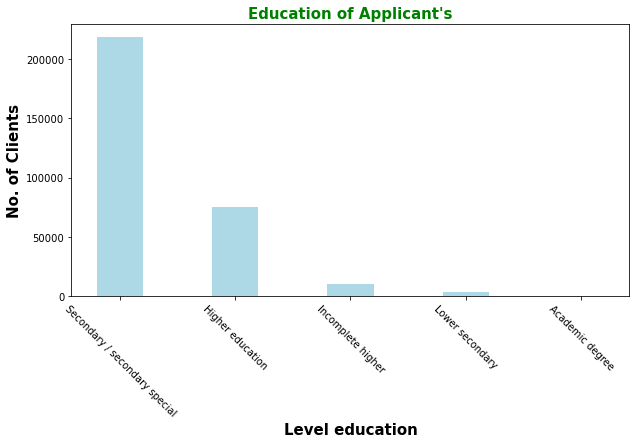

In [109]:
fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
plt.bar(temp.index, temp.values, color ='lightblue',width = 0.4)
 
plt.xticks(temp.index, rotation = -45)
plt.xlabel('Level education', fontweight ='bold', fontsize = 15)
plt.ylabel("No. of Clients", fontweight ='bold', fontsize = 15)
plt.title('Education of Applicant\'s', fontweight ='bold', fontsize = 15, color = 'green')
plt.show()

In [110]:
groupby_target = final.groupby('TARGET')['NAME_EDUCATION_TYPE'].value_counts(normalize = True)

In [111]:
groupby_target

TARGET  NAME_EDUCATION_TYPE          
0.0     Secondary / secondary special    0.703491
        Higher education                 0.250646
        Incomplete higher                0.033270
        Lower secondary                  0.012024
        Academic degree                  0.000570
1.0     Secondary / secondary special    0.786465
        Higher education                 0.161490
        Incomplete higher                0.035126
        Lower secondary                  0.016798
        Academic degree                  0.000121
Name: NAME_EDUCATION_TYPE, dtype: float64

In [112]:
groupby_target[0]

NAME_EDUCATION_TYPE
Secondary / secondary special    0.703491
Higher education                 0.250646
Incomplete higher                0.033270
Lower secondary                  0.012024
Academic degree                  0.000570
Name: NAME_EDUCATION_TYPE, dtype: float64

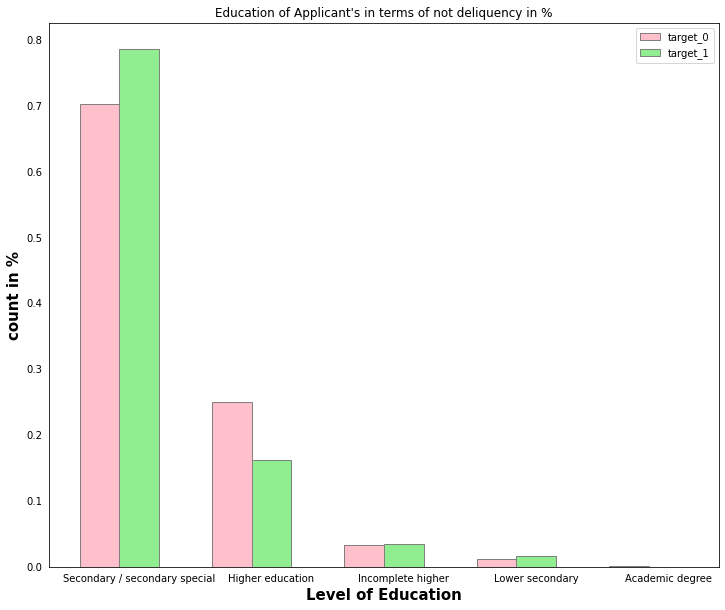

In [163]:
fig = plt.subplots(figsize =(12, 10))
index = groupby_target[0].index
barWidth = 0.3
value_0 = groupby_target[0].values  # cac gtri y
value_1 = groupby_target[1].values
# Set position of bar on X axis
br1 = np.arange(len(value_0))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, value_0, color ='pink', width = barWidth, edgecolor ='grey', label ='target_0')
plt.bar(br2, value_1, color ='lightgreen', width = barWidth, edgecolor ='grey', label ='target_1')
# Xoa vach chia diem
plt.tick_params(left = False, bottom = False)
# Adding Xticks
plt.title("Education of Applicant's in terms of not deliquency in %")
plt.xlabel('Level of Education', fontweight ='bold', fontsize = 15)
plt.ylabel('count in %', fontweight ='bold', fontsize = 15)

plt.xticks([r + barWidth for r in range(len(value_0))],index)

plt.legend()
plt.show()


# 4. ORGANIZATION_TYPE: Types of Organizations in terms of loan is repayed or not in %:

Text(0, 0.5, 'Organization Name')

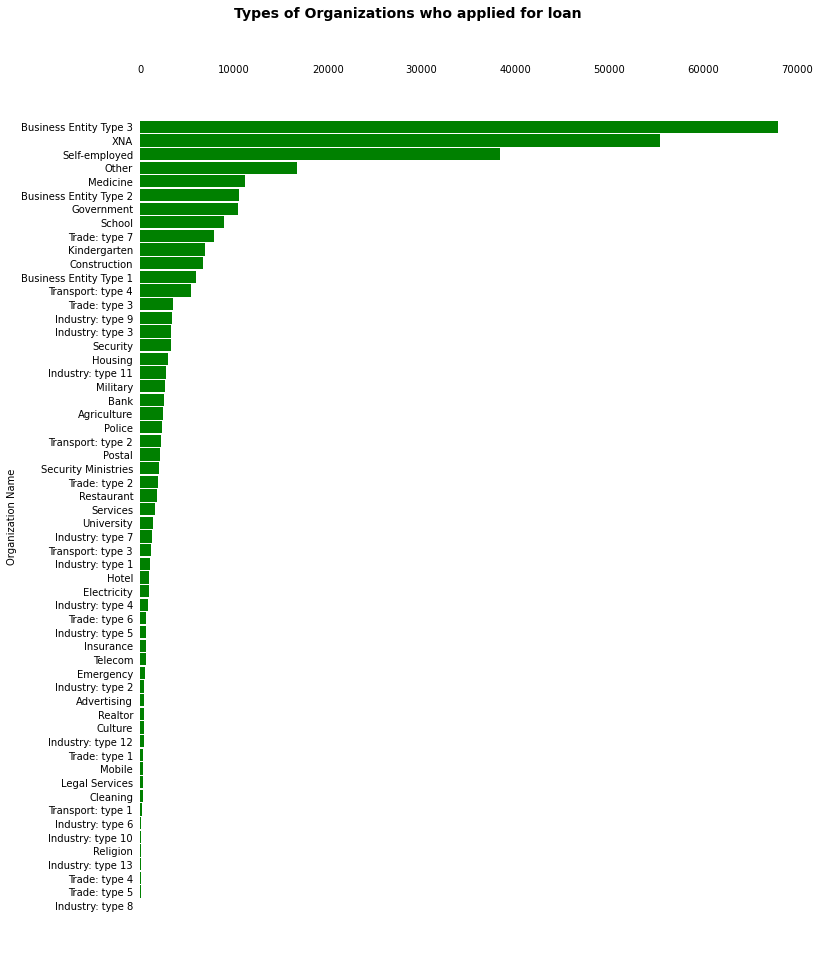

In [119]:
# Distribution of ORGANIZATION_TYPE: types of Organizations who applied for loan
temp = final["ORGANIZATION_TYPE"].value_counts().sort_values()
#temp.head(10)
fig, ax = plt.subplots(figsize = (12, 16))          
ax.barh(temp.index, temp.values, height = 0.9, color = 'green')
l = ['left', 'right', 'top', 'bottom']
for i in l:
    ax.spines[i].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(left = False, top = False)
ax.text(x= 10000, y = 65, s = 'Types of Organizations who applied for loan', size = 14, weight = 'bold')
ax.set_ylabel('Organization Name')

In [120]:
# ORGANIZATION_TYPE: Types of Organizations in terms of loan is repayed or not in %: 
# Các loại hình tổ chức về khoản vay được hoàn trả hay không tính theo %
# Liệu các loại hình tổ chức có ảnh hưởng đến việc trả nợ muộn hay không 

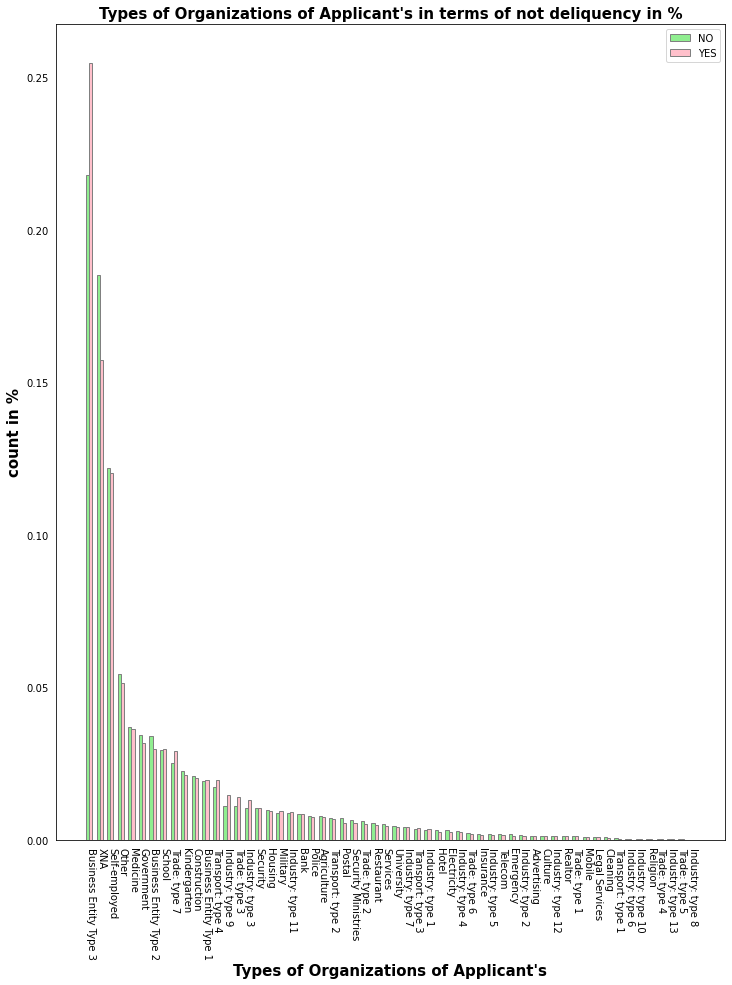

In [164]:
groupby_target = final.groupby('TARGET')['ORGANIZATION_TYPE'].value_counts(normalize = True)
fig = plt.subplots(figsize =(12, 15))
index = groupby_target[0].index
barWidth = 0.3
value_0 = groupby_target[0].values  # cac gtri y
value_1 = groupby_target[1].values
# Set position of bar on X axis
br1 = np.arange(len(value_0))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, value_0, color ='lightgreen', width = barWidth, edgecolor ='grey', label ='NO')
plt.bar(br2, value_1, color ='pink', width = barWidth, edgecolor ='grey', label ='YES')
# Xoa vach chia diem
plt.tick_params(left = False, bottom = False)
# Adding Xticks
plt.title("Types of Organizations of Applicant's in terms of not deliquency in %", fontweight ='bold', fontsize = 15)
plt.xlabel('Types of Organizations of Applicant\'s', fontweight ='bold', fontsize = 15)
plt.ylabel('count in %', fontweight ='bold', fontsize = 15)

plt.xticks([r + barWidth for r in range(len(value_0))],index, rotation = -90)

plt.legend()
plt.show()


# 5. NAME_HOUSING_TYPE: For which types of house higher applicant's applied for loan in terms of loan is repayed or not in %

In [131]:
# Distribution of NAME_HOUSING_TYPE: For which types of house higher applicant's applied for loan ?
temp = final["NAME_HOUSING_TYPE"].value_counts()
temp

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

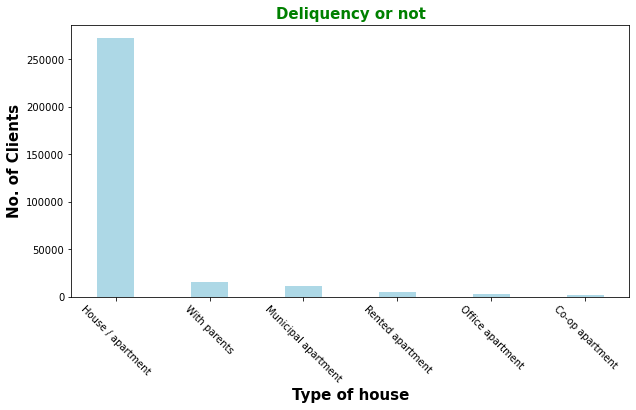

In [137]:
# Clients income type (businessman, working, maternity leave,..)
temp = final["NAME_HOUSING_TYPE"].value_counts()
temp
fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
plt.bar(temp.index, temp.values, color ='lightblue',width = 0.4)
 
plt.xticks(temp.index, rotation = -45)
plt.xlabel('Type of house', fontweight ='bold', fontsize = 15)
plt.ylabel("No. of Clients", fontweight ='bold', fontsize = 15)
plt.title('Deliquency or not', fontweight ='bold', fontsize = 15, color = 'green')
plt.show()

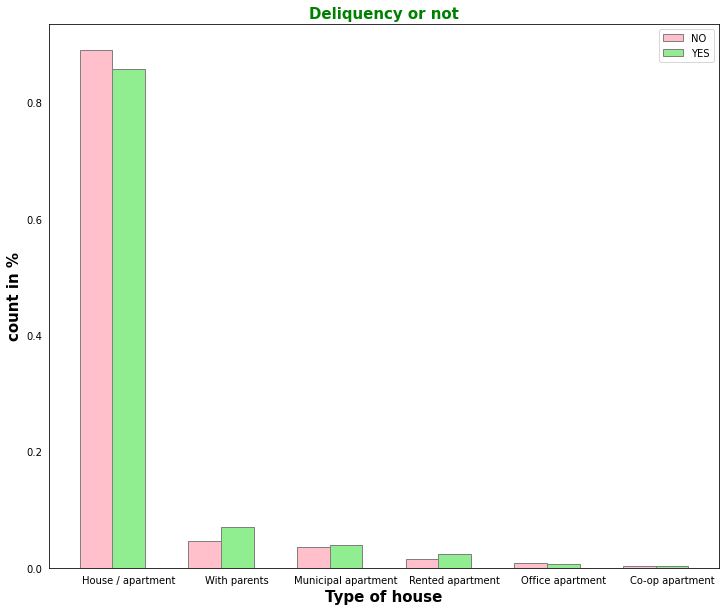

In [139]:
groupby_target = final.groupby('TARGET')['NAME_HOUSING_TYPE'].value_counts(normalize = True)
fig = plt.subplots(figsize =(12, 10))
index = groupby_target[0].index
barWidth = 0.3
value_0 = groupby_target[0].values  # cac gtri y
value_1 = groupby_target[1].values
# Set position of bar on X axis
br1 = np.arange(len(value_0))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, value_0, color ='pink', width = barWidth, edgecolor ='grey', label ='NO')
plt.bar(br2, value_1, color ='lightgreen', width = barWidth, edgecolor ='grey', label ='YES')
# Xoa vach chia diem
plt.tick_params(left = False, bottom = False)
# Adding Xticks
plt.title('Deliquency or not', fontweight ='bold', fontsize = 15, color = 'green')
plt.xlabel('Type of house', fontweight ='bold', fontsize = 15)
plt.ylabel('count in %', fontweight ='bold', fontsize = 15)

plt.xticks([r + barWidth for r in range(len(value_0))],index)

plt.legend()
plt.show()


# 6. 'NAME_CONTRACT_TYPE'

In [141]:
# Distribution of NAME_CONTRACT_TYPE: Types of loan:Identification if loan is cash or revolving(khoản vay xoay vòng)
temp = final['NAME_CONTRACT_TYPE'].value_counts()
temp

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

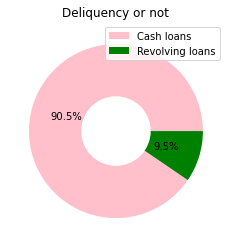

In [144]:
plt.pie(temp.values, autopct='%1.1f%%', colors=['pink', 'green'])
# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
# Adding Title of chart
plt.title('Deliquency or not')
# Add Legends
plt.legend(temp.index, loc="upper right")
# Displaying Chart
plt.show()

In [143]:
# Liệu các loại khoản vay có ảnh hương đến việc trả nợ muộn hay không nếu có thì loại vay nào có khả năng trả nợ muộn cao hơn

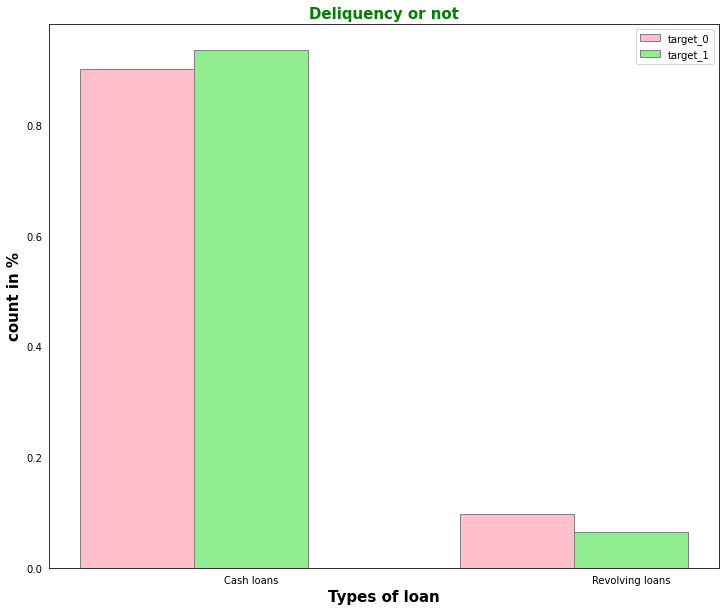

In [145]:
groupby_target = final.groupby('TARGET')['NAME_CONTRACT_TYPE'].value_counts(normalize = True)
fig = plt.subplots(figsize =(12, 10))
index = groupby_target[0].index
barWidth = 0.3
value_0 = groupby_target[0].values  # cac gtri y
value_1 = groupby_target[1].values
# Set position of bar on X axis
br1 = np.arange(len(value_0))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, value_0, color ='pink', width = barWidth, edgecolor ='grey', label ='target_0')
plt.bar(br2, value_1, color ='lightgreen', width = barWidth, edgecolor ='grey', label ='target_1')
# Xoa vach chia diem
plt.tick_params(left = False, bottom = False)
# Adding Xticks
plt.title('Deliquency or not', fontweight ='bold', fontsize = 15, color = 'green')
plt.xlabel('Types of loan', fontweight ='bold', fontsize = 15)
plt.ylabel('count in %', fontweight ='bold', fontsize = 15)

plt.xticks([r + barWidth for r in range(len(value_0))],index)

plt.legend()
plt.show()


# 7.NAME_FAMILY_STATUS: Family Status of Applicant's in terms of loan is deliquency or not in %

In [150]:
# Distribution of NAME_FAMILY_STATUS: Family Status of Applicant's who applied for loan
temp = final["NAME_FAMILY_STATUS"].value_counts()
temp

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

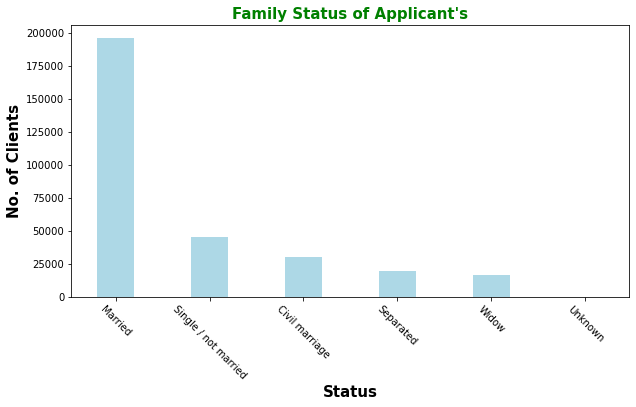

In [151]:
fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
plt.bar(temp.index, temp.values, color ='lightblue',width = 0.4)
 
plt.xticks(temp.index, rotation = -45)
plt.xlabel('Status', fontweight ='bold', fontsize = 15)
plt.ylabel("No. of Clients", fontweight ='bold', fontsize = 15)
plt.title('Family Status of Applicant\'s', fontweight ='bold', fontsize = 15, color = 'green')
plt.show()

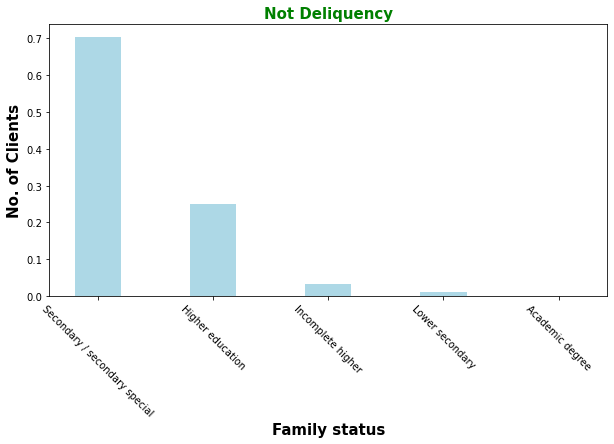

In [162]:
groupby_target = final.groupby('TARGET')['NAME_EDUCATION_TYPE'].value_counts(normalize = True)
temp = groupby_target[0]
fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
plt.bar(temp.index, temp.values, color ='lightblue',width = 0.4)
 
plt.xticks(temp.index, rotation = -45)
plt.xlabel('Family status', fontweight ='bold', fontsize = 15)
plt.ylabel("No. of Clients", fontweight ='bold', fontsize = 15)
plt.title('Not Deliquency', fontweight ='bold', fontsize = 15, color = 'green')
plt.show()

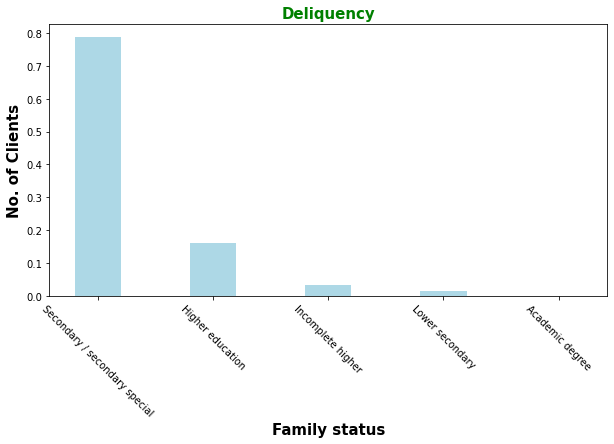

In [159]:
temp = groupby_target[1]
fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
plt.bar(temp.index, temp.values, color ='lightblue',width = 0.4)
 
plt.xticks(temp.index, rotation = -45)
plt.xlabel('Family status', fontweight ='bold', fontsize = 15)
plt.ylabel("No. of Clients", fontweight ='bold', fontsize = 15)
plt.title('Deliquency', fontweight ='bold', fontsize = 15, color = 'green')
plt.show()